# <center> LOAN APPROVAL PREDICTION </center>

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings to ignore all the warning while visualizing

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing the dataset
df = pd.read_csv("/Users/dheeraj_pittala/Downloads/Loan Approval Detection Project/loan_data.csv")

In [3]:
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [4]:
# Shape of the dataset
rows, columns = df.shape
print("No.of rows in the datasets =", rows)
print("No.of columns in the datasets =", columns)

No.of rows in the datasets = 9578
No.of columns in the datasets = 14


In [5]:
print("Dataset Info:\n")
df.info()

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

In [7]:
#Finding the missing values
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [8]:
# Dropping the duplicate values
df = df.drop_duplicates()

In [9]:
print(df.shape)

(9578, 14)


# Exploratory Data Analysis

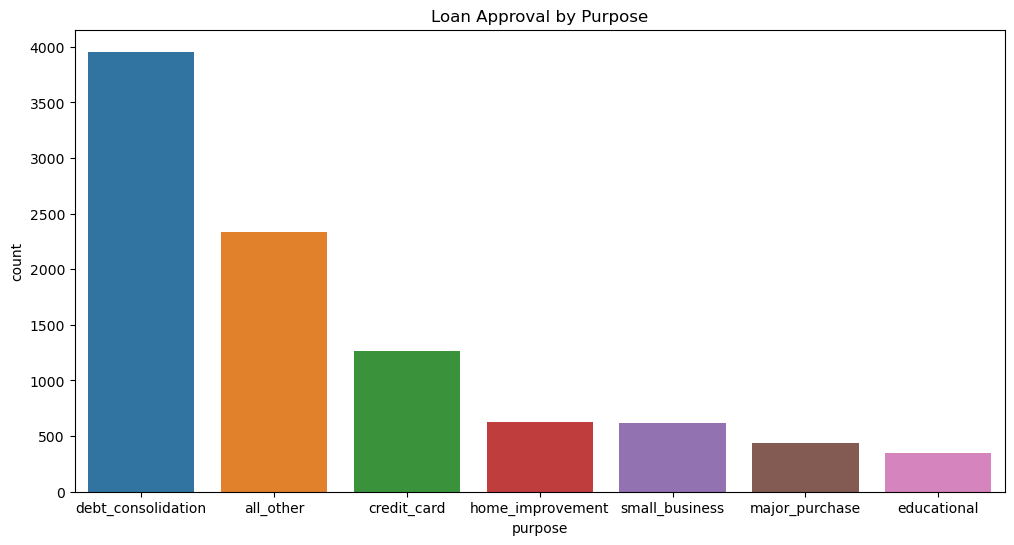

In [10]:
# Distribution of the purpose of the loan
plt.figure(figsize=(12, 6))
order = df['purpose'].value_counts().index  # Sort by counts
sns.countplot(x='purpose', data=df, order=order)
plt.title('Loan Approval by Purpose')
plt.show()

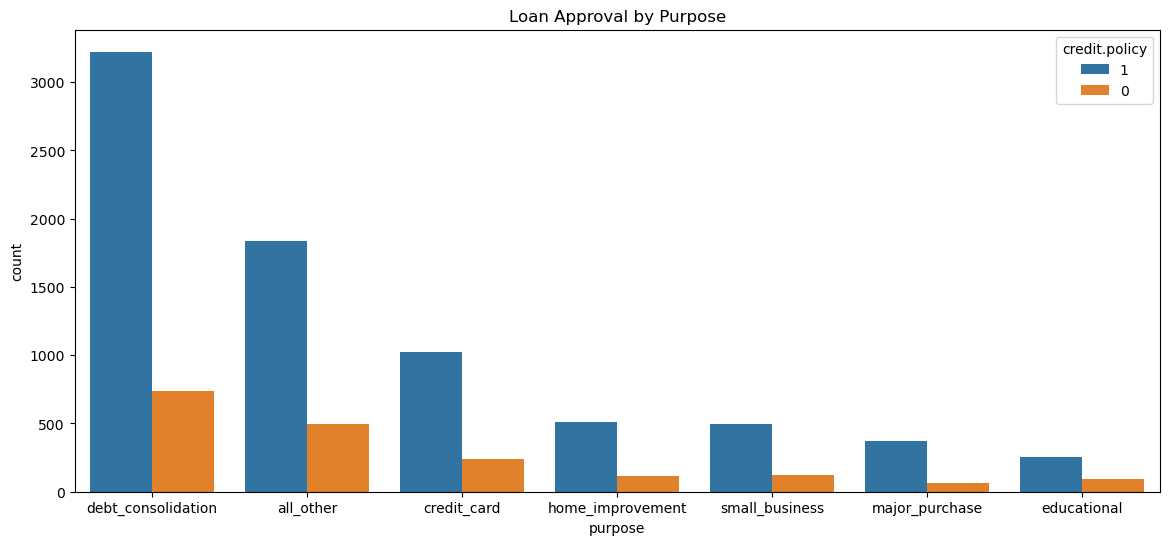

In [11]:
# Distribution of the purpose of the loan with respect to credit policy

df['credit.policy'] = df['credit.policy'].astype(str)

plt.figure(figsize=(14, 6))
order = df['purpose'].value_counts().index  # Sort by counts
sns.countplot(x='purpose', hue='credit.policy', data=df, order = order)
plt.title('Loan Approval by Purpose')
plt.show()

In [12]:
dummies = pd.get_dummies(df['purpose']).astype(int)
dummies

all_other  credit_card  debt_consolidation  educational  \
0             0            0                   1            0   
1             0            1                   0            0   
2             0            0                   1            0   
3             0            0                   1            0   
4             0            1                   0            0   
...         ...          ...                 ...          ...   
9573          1            0                   0            0   
9574          1            0                   0            0   
9575          0            0                   1            0   
9576          0            0                   0            0   
9577          0            0                   1            0   

      home_improvement  major_purchase  small_business  
0                    0               0               0  
1                    0               0               0  
2                    0               0               0  
3                    0               0               0  
4                    0               0               0  
...                ...             ...             ...  
9573                 0               0               0  
9574                 0               0               0  
9575                 0               0               0  
9576                 1               0               0  
9577                 0               0               0  

[9578 rows x 7 columns]

In [13]:
df = pd.concat([df,dummies],axis=1)
df = df.drop(columns = ['purpose'])
df.head()

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0             1    0.1189       829.10       11.350407  19.48   737   
1             1    0.1071       228.22       11.082143  14.29   707   
2             1    0.1357       366.86       10.373491  11.63   682   
3             1    0.1008       162.34       11.350407   8.10   712   
4             1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  all_other  credit_card  debt_consolidation  \
0        0               0          0            0                   1   
1        0               0          0            1                   0   
2        0               0          0            0                   1   
3        0               0          0            0                   1   
4        0               0          0            1                   0   

   educational  home_improvement  major_purchase  small_business  
0            0                 0               0               0  
1            0                 0               0               0  
2            0                 0               0               0  
3            0                 0               0               0  
4            0                 0               0               0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   credit.policy       9578 non-null   object 
 1   int.rate            9578 non-null   float64
 2   installment         9578 non-null   float64
 3   log.annual.inc      9578 non-null   float64
 4   dti                 9578 non-null   float64
 5   fico                9578 non-null   int64  
 6   days.with.cr.line   9578 non-null   float64
 7   revol.bal           9578 non-null   int64  
 8   revol.util          9578 non-null   float64
 9   inq.last.6mths      9578 non-null   int64  
 10  delinq.2yrs         9578 non-null   int64  
 11  pub.rec             9578 non-null   int64  
 12  not.fully.paid      9578 non-null   int64  
 13  all_other           9578 non-null   int64  
 14  credit_card         9578 non-null   int64  
 15  debt_consolidation  9578 non-null   int64  
 16  educat

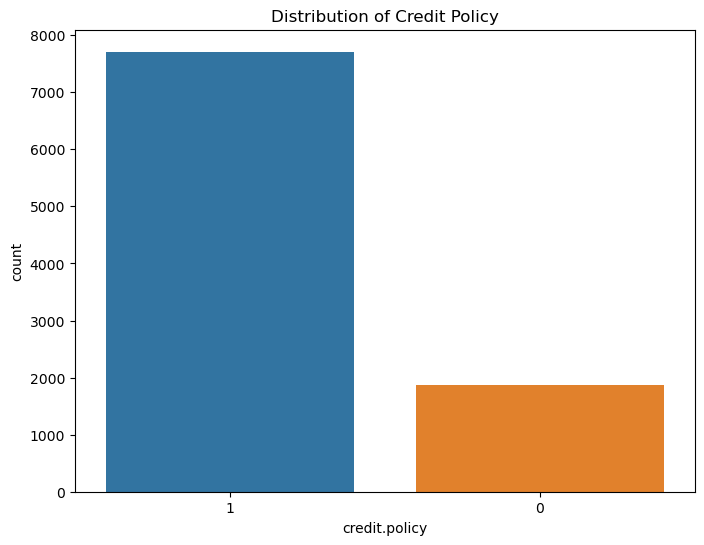

In [15]:
# Visualize the distribution of the credit policy
plt.figure(figsize=(8, 6))
sns.countplot(x='credit.policy', data=df)
plt.title('Distribution of Credit Policy')
plt.show()

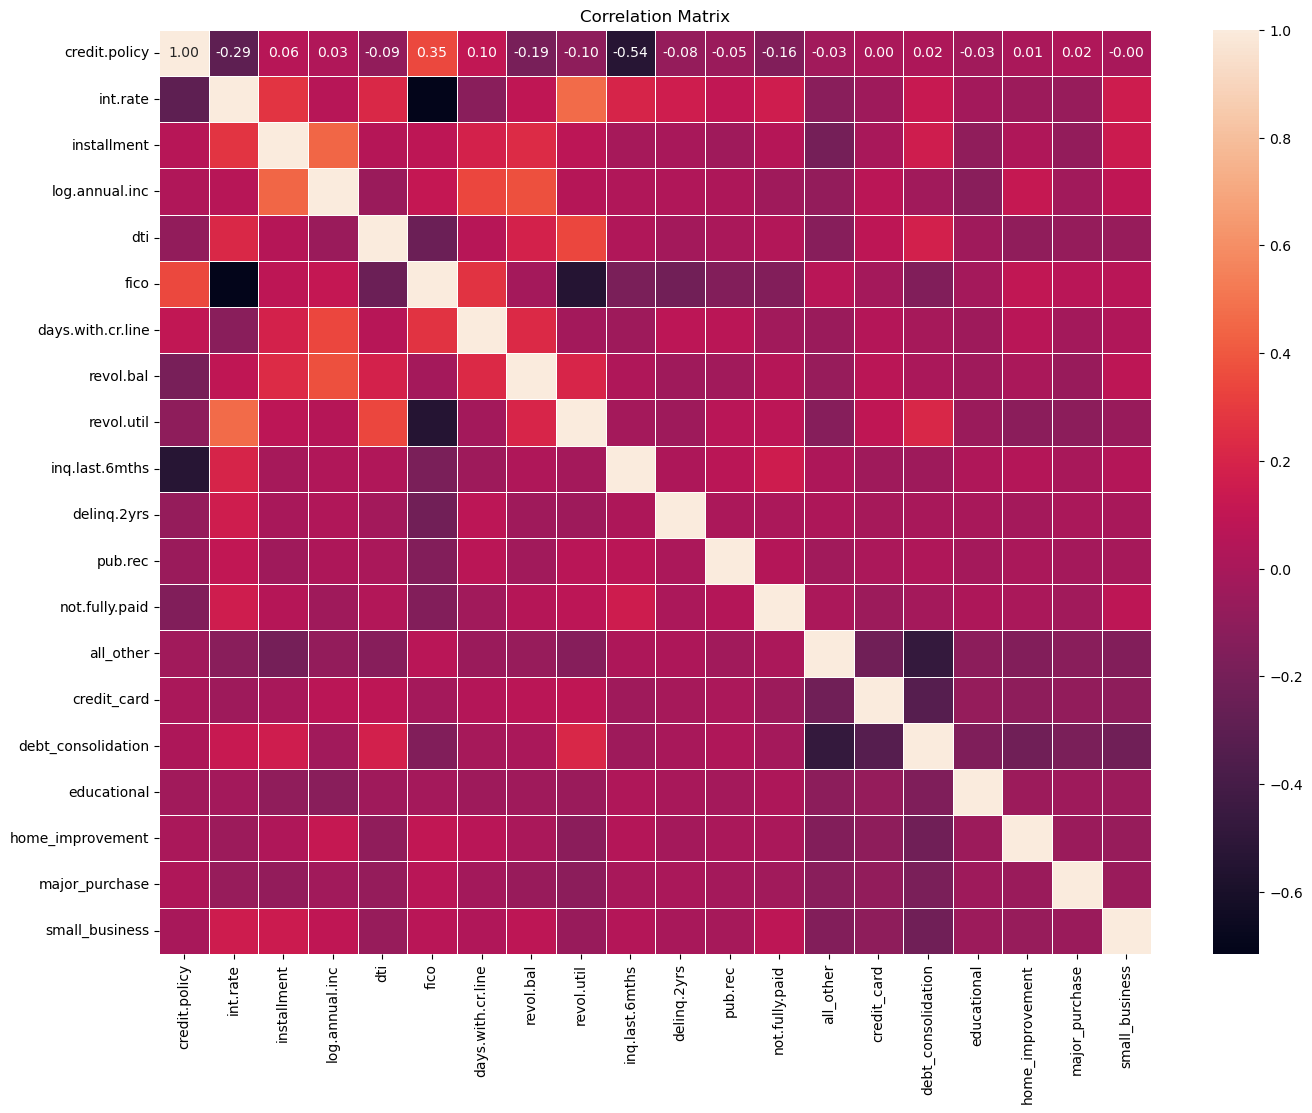

In [16]:
# Correlation matrix to understand relationships between numerical features

correlation_matrix = df.corr()

# Plotting correlation matrix heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

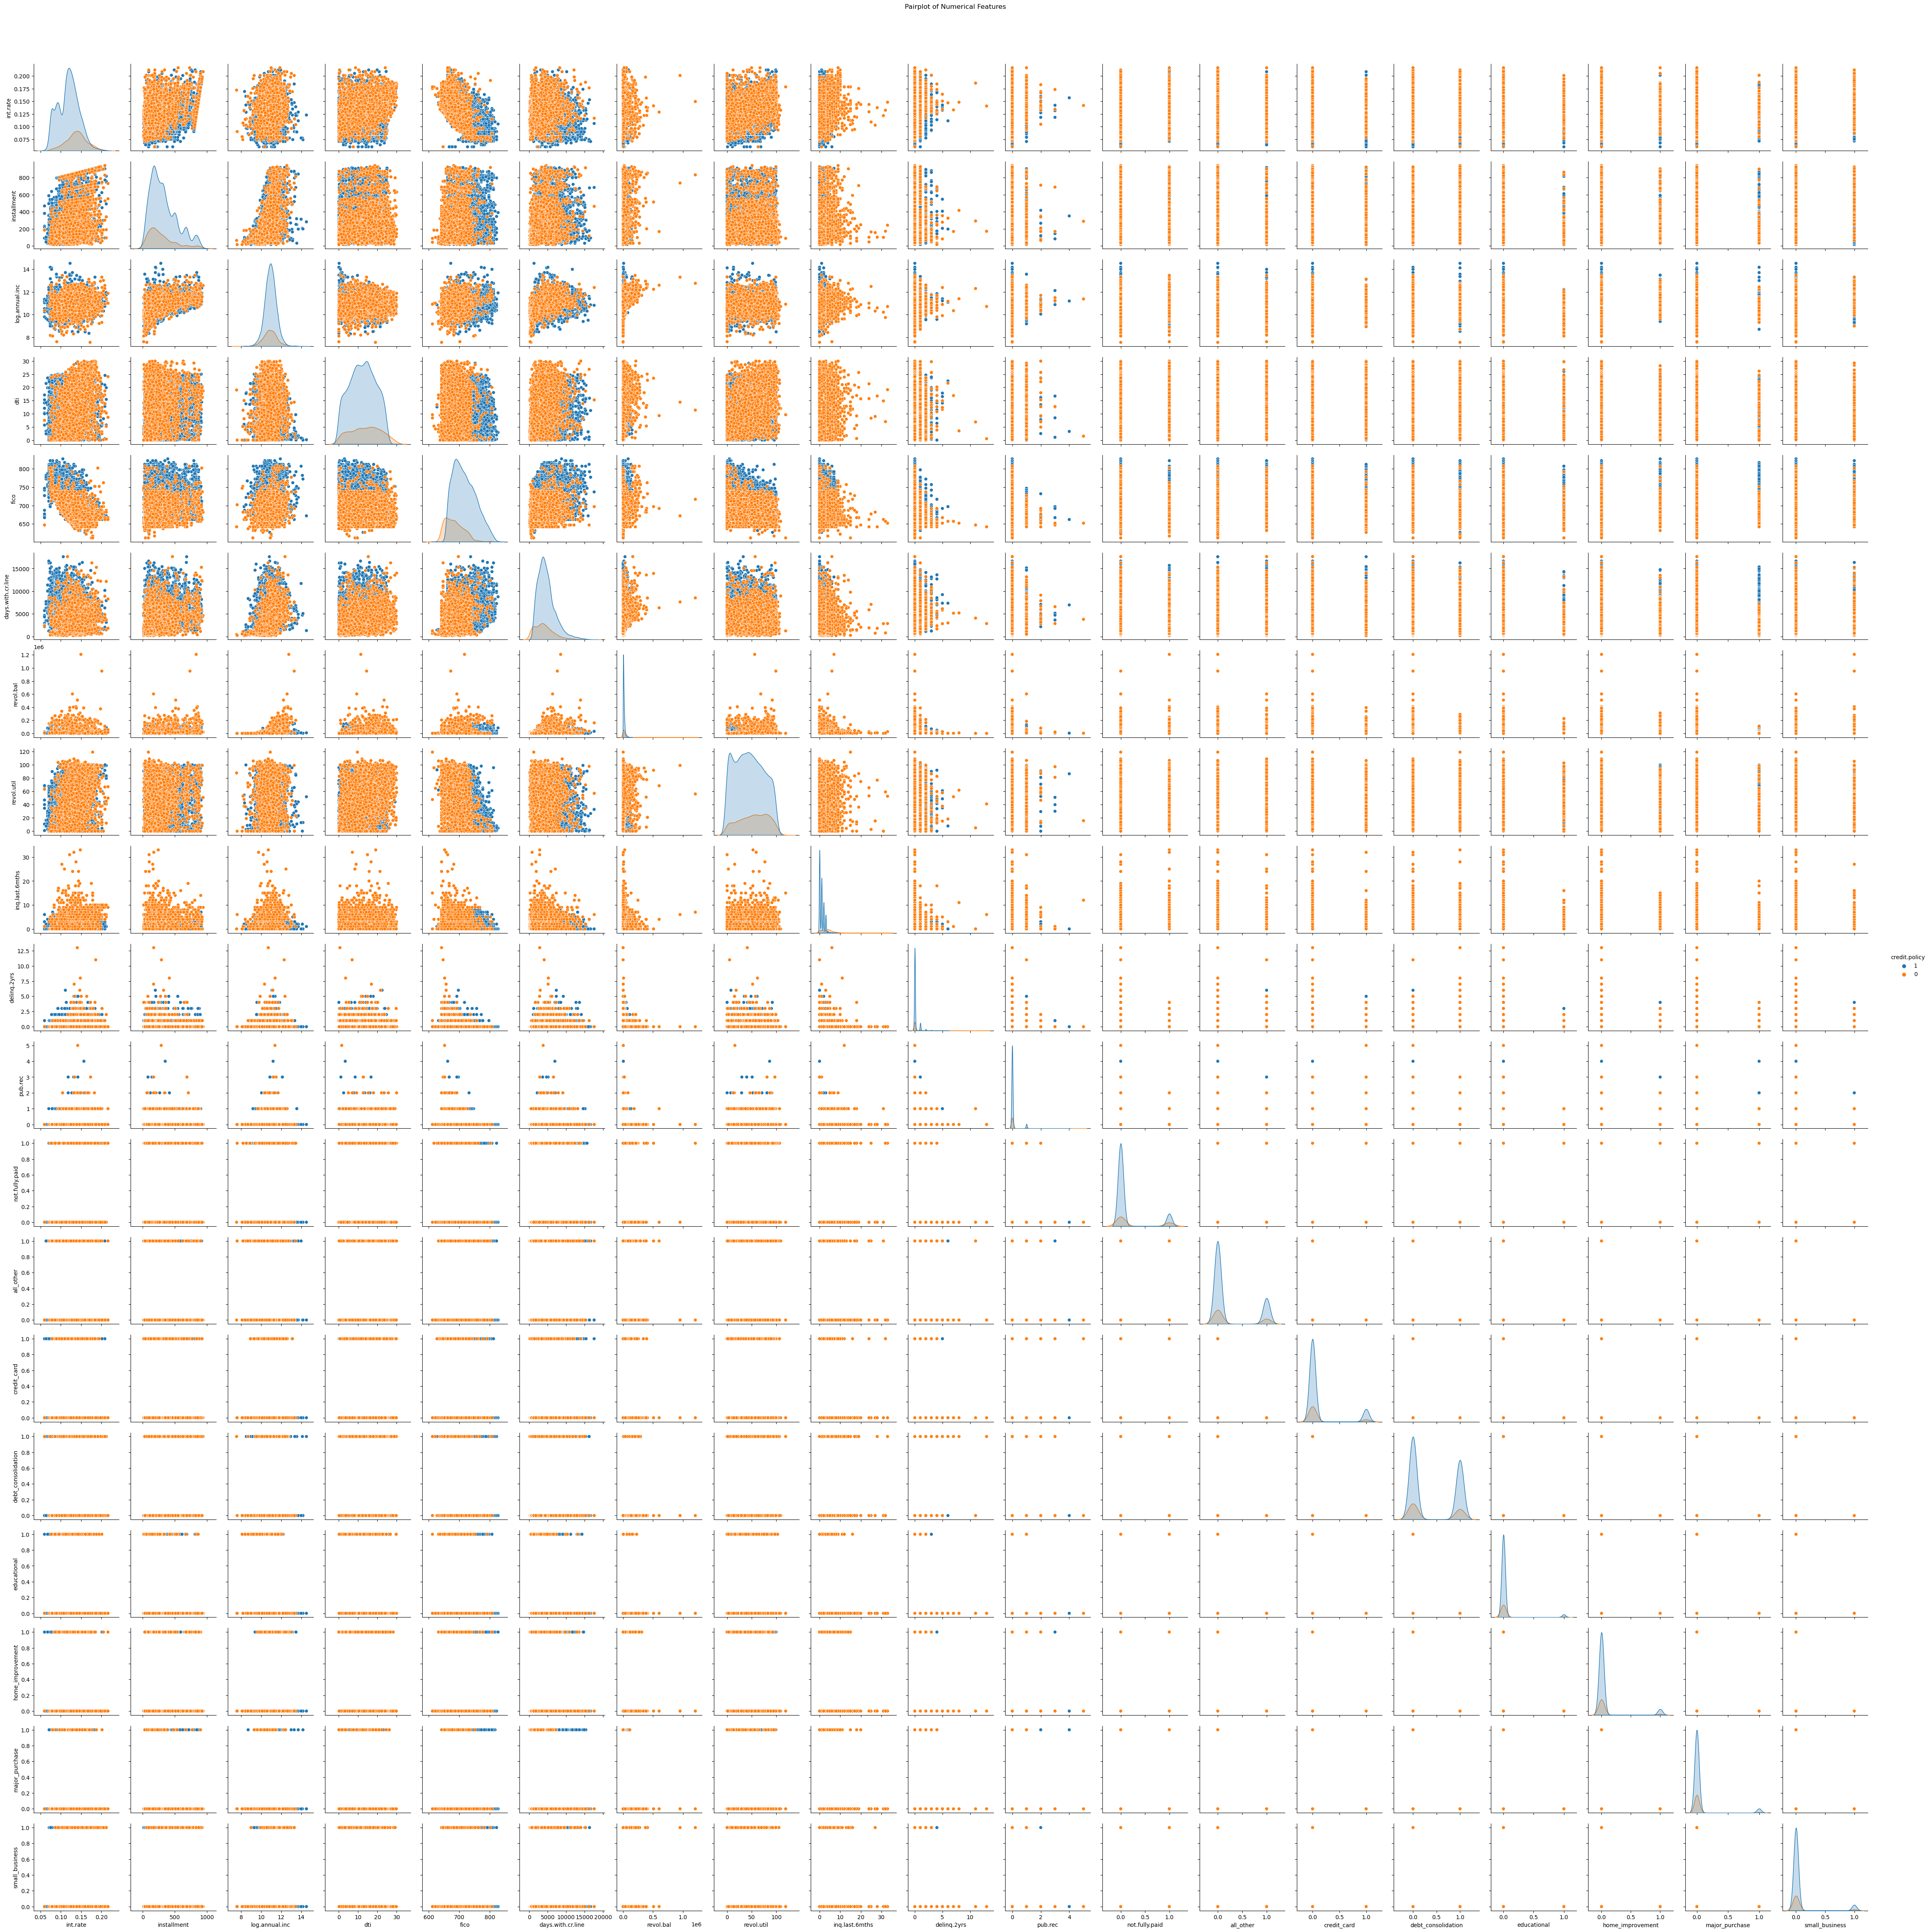

In [17]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(df, hue='credit.policy')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

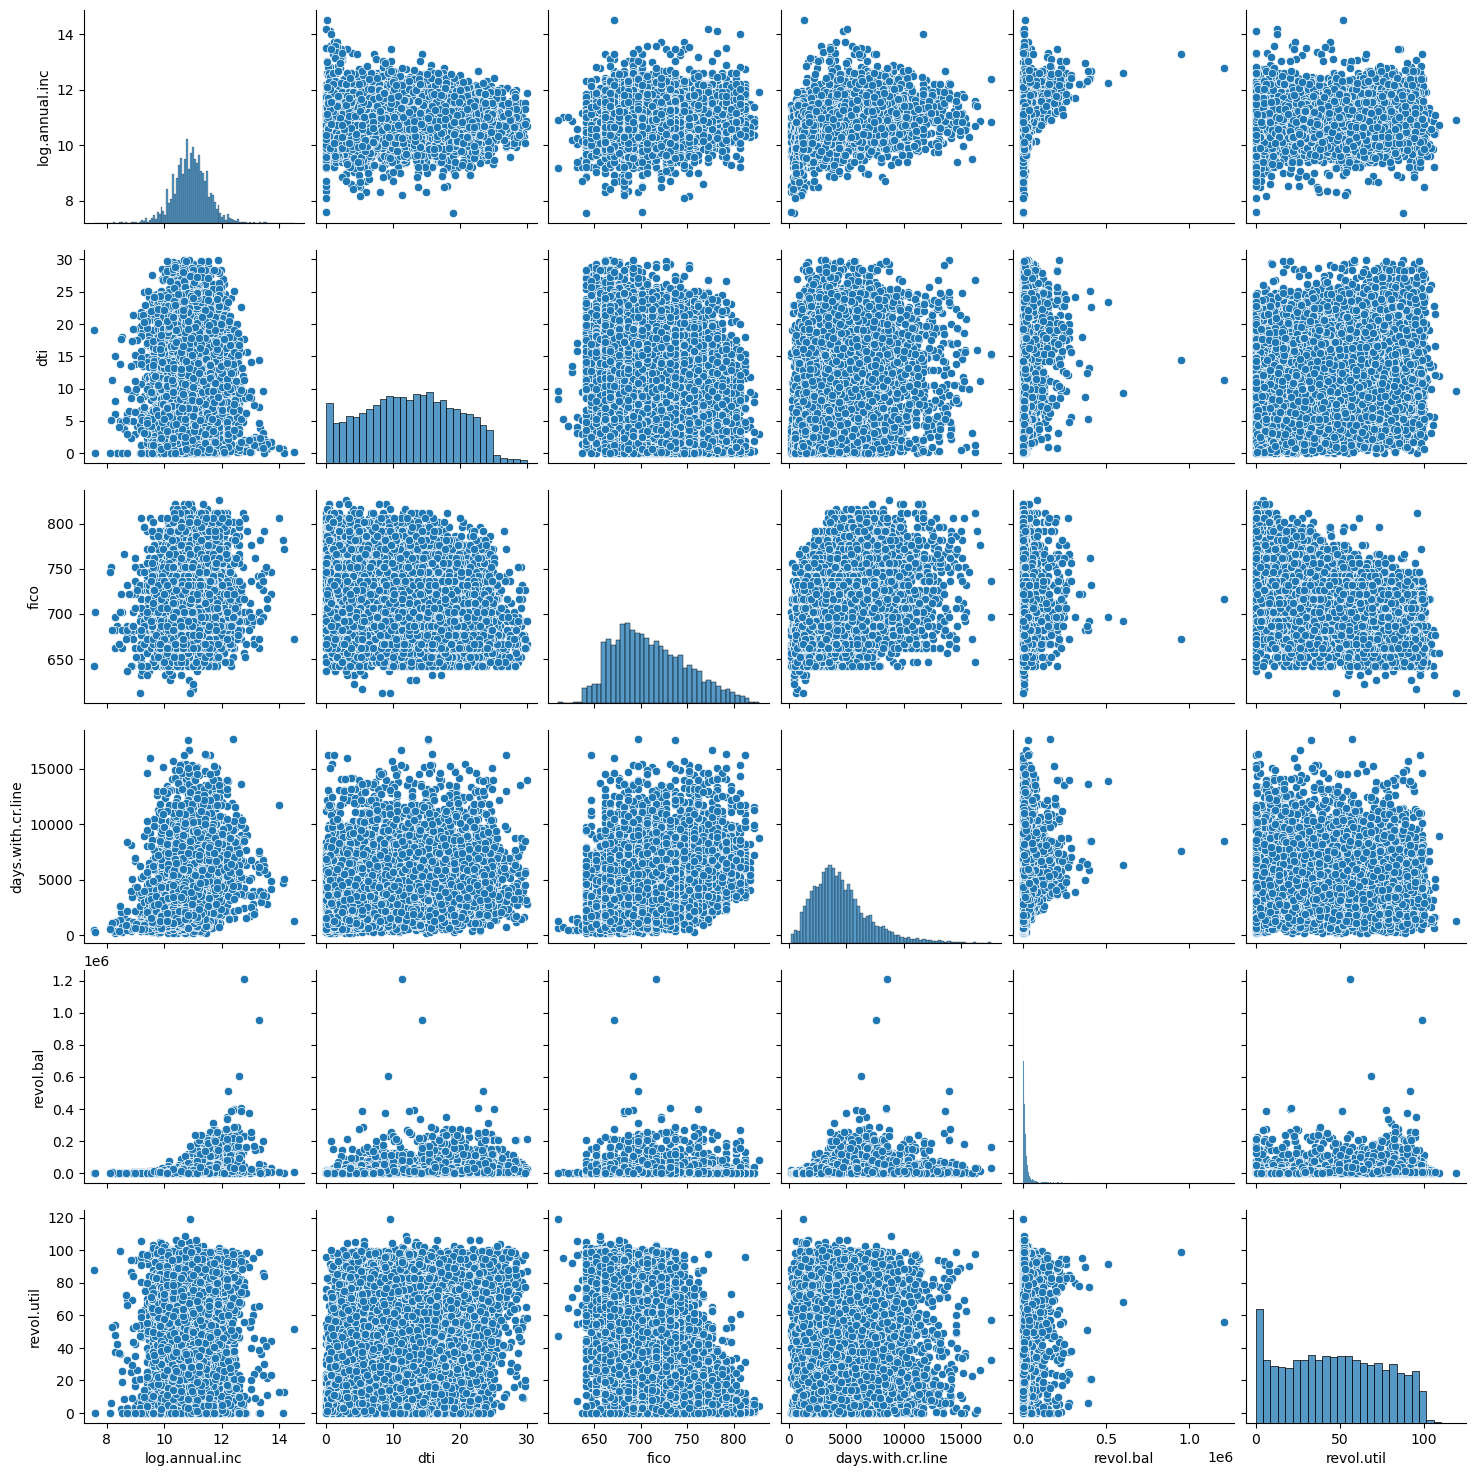

In [18]:
# Explore relationships between numerical features
sns.pairplot(df[['log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util']])
plt.show()

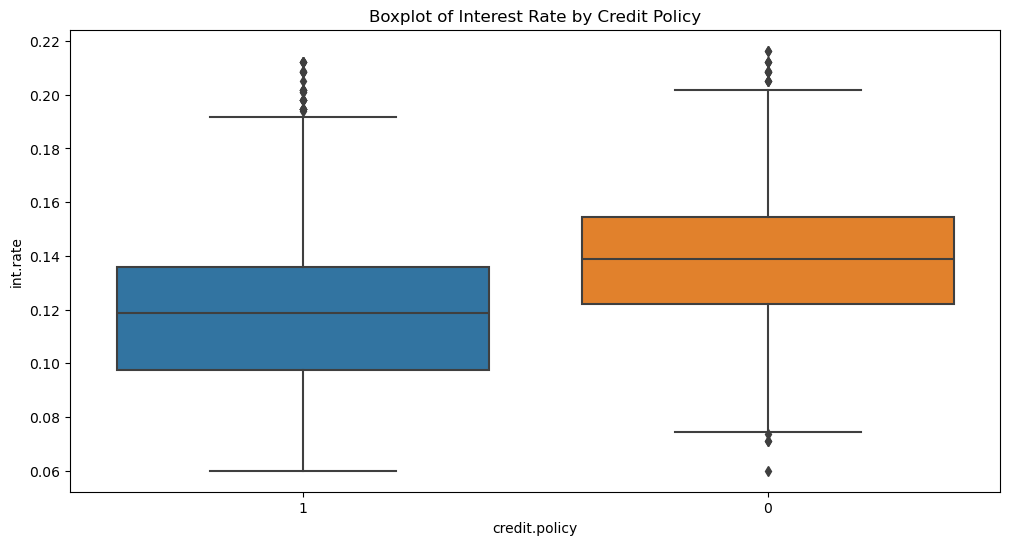

In [19]:
# Boxplot of interest rate by credit policy
plt.figure(figsize=(12, 6))
sns.boxplot(x='credit.policy', y='int.rate', data=df)
plt.title('Boxplot of Interest Rate by Credit Policy')
plt.show()

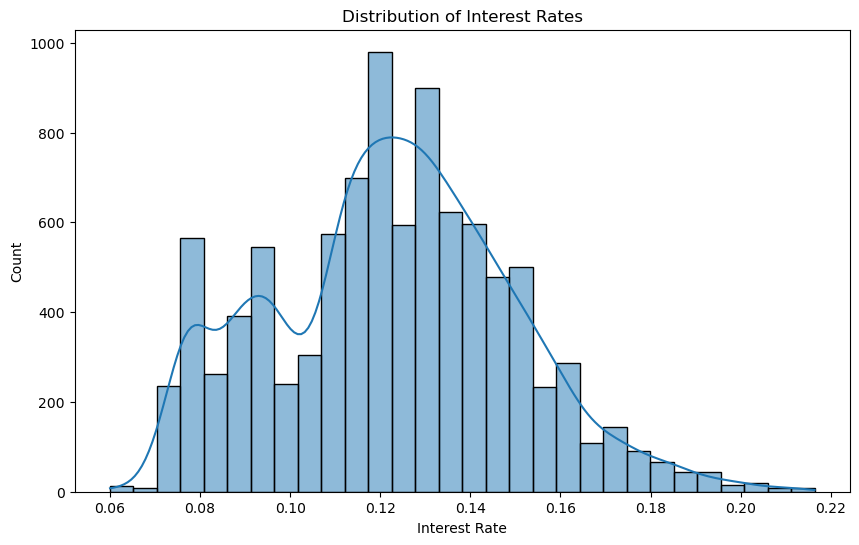

In [20]:
# Explore the distribution of interest rates
plt.figure(figsize=(10, 6))
sns.histplot(df['int.rate'], bins=30, kde=True)
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate')
plt.show()

# Balanching the Dataset

In [21]:
df['credit.policy'].value_counts()

credit.policy
1    7710
0    1868
Name: count, dtype: int64

In [22]:
# separating the data for analysis

df['credit.policy'] = df['credit.policy'].astype(int)

approved = df[df['credit.policy'] == 1]
denied = df[df['credit.policy'] == 0]

In [23]:
print(approved.shape)
print(denied.shape)

(7710, 20)
(1868, 20)


In [24]:
# compare the values for both transactions
df.groupby('credit.policy').mean()

int.rate  installment  log.annual.inc        dti        fico  \
credit.policy                                                                 
0              0.138680   294.367115        10.88852  13.877901  683.978051   
1              0.118754   325.079200        10.94268  12.298684  717.356031   

               days.with.cr.line    revol.bal  revol.util  inq.last.6mths  \
credit.policy                                                               
0                    4058.456304  29773.15257   52.934872        3.971092   
1                    4682.468461  13798.40428   45.312677        0.997536   

               delinq.2yrs   pub.rec  not.fully.paid  all_other  credit_card  \
credit.policy                                                                  
0                 0.248394  0.091006        0.277837   0.265525     0.129550   
1                 0.143191  0.055123        0.131518   0.238003     0.132296   

               debt_consolidation  educational  home_improvement  \
credit.policy                                                      
0                        0.392934     0.047645          0.062634   
1                        0.418029     0.032944          0.066407   

               major_purchase  small_business  
credit.policy                                  
0                    0.035332        0.066381  
1                    0.048119        0.064202

In [25]:
# Since the dataset is highly imbalanced, we can use the resampling techniques which is either over sampling or under sampling.
# Here I wish to use under sampling 

approved_sample = approved.sample(n=1868) #Randomly selects 1878 samples

In [26]:
# Combining the two dataframes

new_df = pd.concat([approved_sample, denied], axis=0)

new_df.head()

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
3678              1    0.1821        90.65       10.915088  12.07   667   
3559              1    0.0768        93.58       10.668862   3.77   807   
7699              1    0.1095       255.17       10.404263  20.29   742   
4481              1    0.0894       508.35       11.695247  23.10   782   
2326              1    0.1284       336.18       10.596635  19.44   727   

      days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
3678        2460.000000      19336        79.6               0            0   
3559        4711.000000        133         0.3               0            0   
7699        9599.958333      11904        38.3               0            0   
4481        6389.958333      78633        31.7               1            0   
2326        4470.000000      17944        57.5               0            0   

      pub.rec  not.fully.paid  all_other  credit_card  debt_consolidation  \
3678        0               0          0            0                   0   
3559        0               0          0            0                   0   
7699        0               1          0            0                   1   
4481        0               0          1            0                   0   
2326        0               0          0            0                   1   

      educational  home_improvement  major_purchase  small_business  
3678            0                 0               0               1  
3559            0                 0               1               0  
7699            0                 0               0               0  
4481            0                 0               0               0  
2326            0                 0               0               0

In [27]:
new_df['credit.policy'].value_counts()

credit.policy
1    1868
0    1868
Name: count, dtype: int64

In [28]:
new_df.groupby('credit.policy').mean()

int.rate  installment  log.annual.inc        dti        fico  \
credit.policy                                                                 
0              0.138680   294.367115       10.888520  13.877901  683.978051   
1              0.118816   328.023394       10.962353  12.430321  716.416488   

               days.with.cr.line     revol.bal  revol.util  inq.last.6mths  \
credit.policy                                                                
0                    4058.456304  29773.152570   52.934872        3.971092   
1                    4613.691225  14461.675054   45.614888        1.031049   

               delinq.2yrs   pub.rec  not.fully.paid  all_other  credit_card  \
credit.policy                                                                  
0                 0.248394  0.091006        0.277837   0.265525     0.129550   
1                 0.143469  0.055675        0.123126   0.251606     0.127409   

               debt_consolidation  educational  home_improvement  \
credit.policy                                                      
0                        0.392934     0.047645          0.062634   
1                        0.417559     0.038544          0.065846   

               major_purchase  small_business  
credit.policy                                  
0                    0.035332        0.066381  
1                    0.040685        0.058351

# Model Selection and Execution

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler

In [30]:
X = new_df.drop('credit.policy', axis=1)
y = new_df['credit.policy']

In [31]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Model training
rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)

In [33]:
#Fitting the Random Forest Classifier
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
# Fitting the Support Vector Classifier
svm.fit(X_train, y_train)

SVC(random_state=42)

In [35]:
# Predictions with RFC
y_pred_rf = rf.predict(X_test)

# Predictions with SVC
y_pred_svm = svm.predict(X_test)

In [53]:
# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy (RFC): {accuracy_rf:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report (RFC):')
print(classification_report(y_test, y_pred_rf))

print('\nConfusion Matrix (RFC):')
print(confusion_matrix(y_test, y_pred_rf))

Accuracy (RFC): 0.97

Classification Report (RFC):
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       356
           1       0.97      0.97      0.97       392

    accuracy                           0.97       748
   macro avg       0.97      0.97      0.97       748
weighted avg       0.97      0.97      0.97       748


Confusion Matrix (RFC):
[[343  13]
 [ 10 382]]


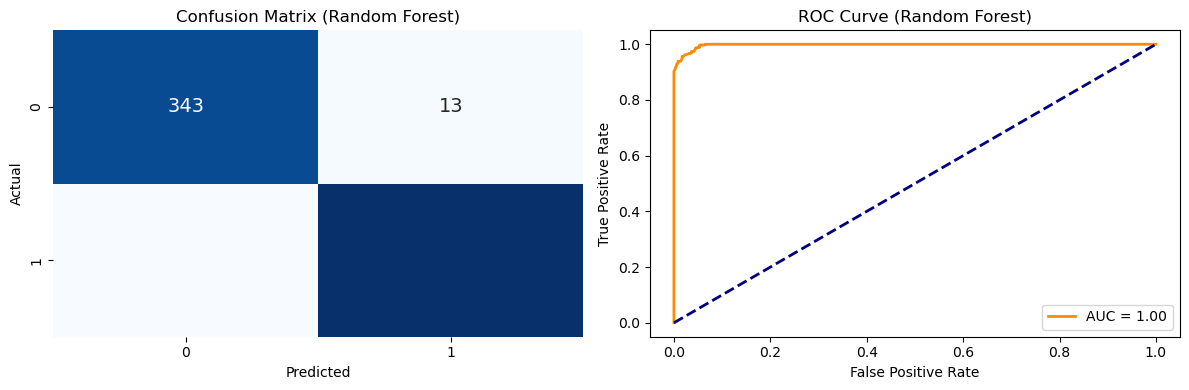

In [37]:
# Confusion Matrix for RandomForestClassifier
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(12, 4))

# Confusion Matrix
plt.subplot(1, 2, 1)
plt.title('Confusion Matrix (Random Forest)')
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('Actual')

# ROC Curve for RandomForestClassifier
y_probs_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.subplot(1, 2, 2)
plt.title('ROC Curve (Random Forest)')
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'AUC = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [38]:
# Evaluate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy (SVM): {accuracy_svm:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report (SVM):')
print(classification_report(y_test, y_pred_svm))

print('\nConfusion Matrix (SVM):')
print(confusion_matrix(y_test, y_pred_svm))

Accuracy (SVM): 0.59

Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.58      0.47      0.52       356
           1       0.59      0.69      0.64       392

    accuracy                           0.59       748
   macro avg       0.58      0.58      0.58       748
weighted avg       0.58      0.59      0.58       748


Confusion Matrix (SVM):
[[167 189]
 [121 271]]


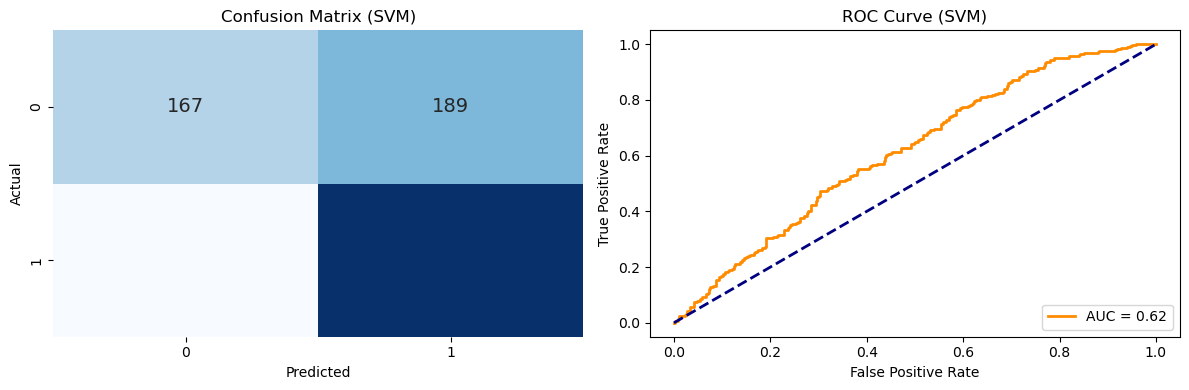

In [39]:
# Visualizing the Confusion Matrix for Support Vector Machine (SVM)
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(12, 4))

# Confusion Matrix
plt.subplot(1, 2, 1)
plt.title('Confusion Matrix (SVM)')
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('Actual')

# ROC Curve for Support Vector Machine (SVM)
y_probs_svm = svm.decision_function(X_test)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_probs_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.subplot(1, 2, 2)
plt.title('ROC Curve (SVM)')
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'AUC = {roc_auc_svm:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

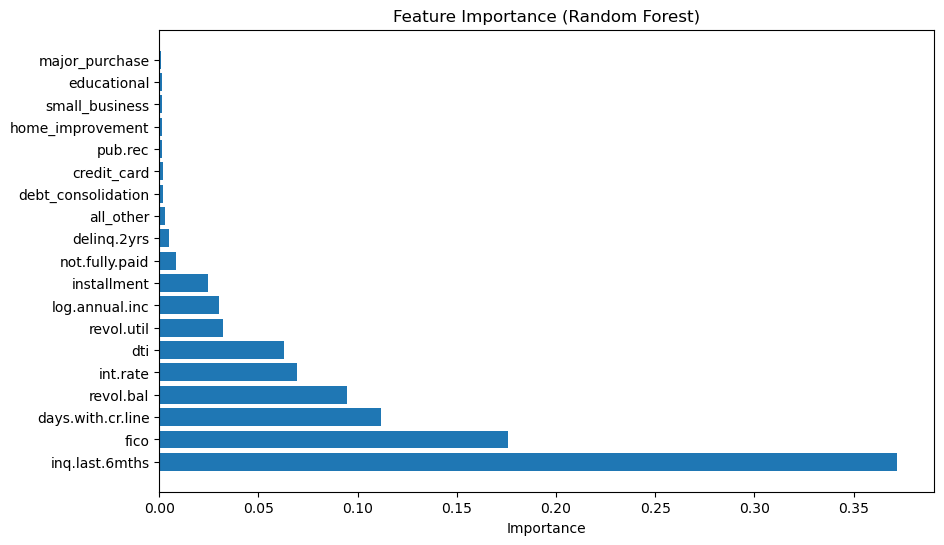

In [40]:
# Get feature importances from the RandomForestClassifier
feature_importance_rf = rf.feature_importances_
features_rf = X.columns

# Create a DataFrame for feature importances
feature_importance_df_rf = pd.DataFrame({'Feature': features_rf, 'Importance': feature_importance_rf})
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_rf['Feature'], feature_importance_df_rf['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()

In [41]:
# On the basis of the feature importance, I would like to re-run the modelling to notice change in prediction and evaluation

# Get the top 10 features from feature importance
top_features = feature_importance_df_rf.head(10)['Feature'].tolist()  # Adjust the number of top features as needed

print(top_features)

['inq.last.6mths', 'fico', 'days.with.cr.line', 'revol.bal', 'int.rate', 'dti', 'revol.util', 'log.annual.inc', 'installment', 'not.fully.paid']


In [42]:
# Selecting only the most important features
X_top_features = X[top_features]

# Split the data into training and testing sets
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top_features, y, test_size=0.2, random_state=42)

rf.fit(X_train_top, y_train_top)

# Make predictions on the test set
y_pred_top = rf.predict(X_test_top)

In [43]:
# Evaluate the model
accuracy_top = accuracy_score(y_test_top, y_pred_top)
print(f'Accuracy with Top Features: {accuracy_top:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report with Top Features:')
print(classification_report(y_test_top, y_pred_top))

print('\nConfusion Matrix with Top Features:')
print(confusion_matrix(y_test_top, y_pred_top))

Accuracy with Top Features: 0.97

Classification Report with Top Features:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       356
           1       0.97      0.98      0.97       392

    accuracy                           0.97       748
   macro avg       0.97      0.97      0.97       748
weighted avg       0.97      0.97      0.97       748


Confusion Matrix with Top Features:
[[344  12]
 [  9 383]]


# What was the impact of credit history length towards the loan approval and interest rates.

In [44]:
# Select relevant features
features = df[['days.with.cr.line', 'credit.policy', 'int.rate']]

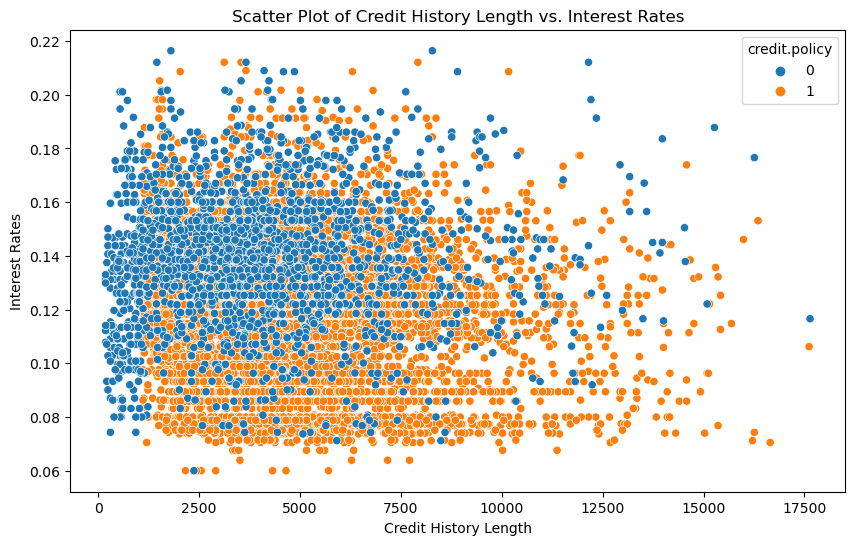

In [45]:
# Scatter plot of credit history length vs. interest rates
plt.figure(figsize=(10, 6))
sns.scatterplot(x='days.with.cr.line', y='int.rate', hue='credit.policy', data=features)
plt.title('Scatter Plot of Credit History Length vs. Interest Rates')
plt.xlabel('Credit History Length')
plt.ylabel('Interest Rates')
plt.show()

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
# Select features and target variables
X_reg = features[['days.with.cr.line', 'credit.policy']]
y_reg = features['int.rate']

In [48]:
# Split the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [49]:
# Build the RandomForestRegressor
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train_reg, y_train_reg)

RandomForestRegressor(random_state=42)

Mean Squared Error for Rrandom Forest Regressor: 0.0008




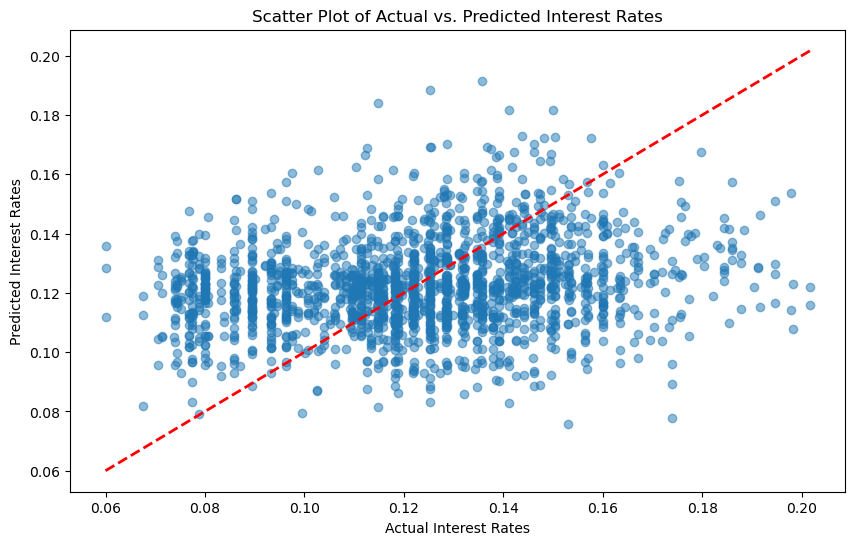

In [50]:
# Make predictions on the test set
y_pred_reg = rfr.predict(X_test_reg)

# Evaluate the model
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
print(f'Mean Squared Error for Rrandom Forest Regressor: {mse_reg:.4f}')
print('\n')

# Scatter plot of actual vs. predicted interest rates
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red', linestyle='--', lw=2)
plt.xlabel('Actual Interest Rates')
plt.ylabel('Predicted Interest Rates')
plt.title('Scatter Plot of Actual vs. Predicted Interest Rates')
plt.show()

In [51]:
from sklearn.linear_model import LinearRegression

# Build the Linear Regression model
lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)

LinearRegression()

Mean Squared Error for Linear Regression: 0.0006




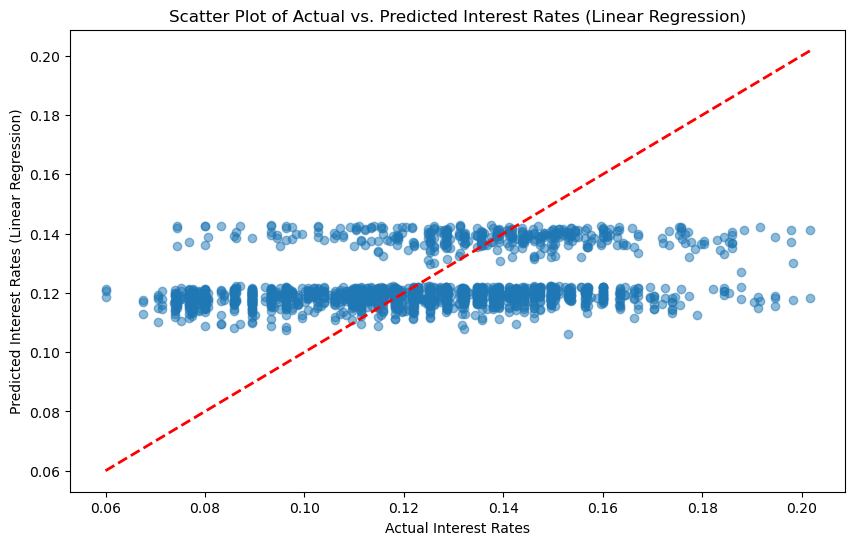

In [52]:
# Make predictions on the test set
y_pred_linear = lr.predict(X_test_reg)

# Evaluate the model
mse_linear = mean_squared_error(y_test_reg, y_pred_linear)
print(f'Mean Squared Error for Linear Regression: {mse_linear:.4f}')
print('\n')

# Scatter plot of actual vs. predicted interest rates for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_linear, alpha=0.5)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red', linestyle='--', lw=2)
plt.xlabel('Actual Interest Rates')
plt.ylabel('Predicted Interest Rates (Linear Regression)')
plt.title('Scatter Plot of Actual vs. Predicted Interest Rates (Linear Regression)')
plt.show()

# Conclusion: